This project seeks to conduct an analysis of a heart disease dataset utilizing roughly 13 attributes to determine whether an individual has a diagnosis of heart disease or not. 

In the analysis below, we'll initiate an analysis of the dataset to detemrine a diagnosis of heart disease from the imported data library from Kaggle. To initiate, data will first be cleaned, the target variables will be graphed alongside the predictor variables, and a determination will be made of which ML approch/model to leverage. Conducting this analysis is key because it enables clinicials such as nurses, doctors or researchers determine whether an individual has heart disease or not, and help train some models that can predict the chances of someone having heart disease, within the confines of the 14 attributes discussed in the dataset. This can enhance healthcare delivery, increase efficencies, and support medical reasearch. The data can be accessed at the following link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data. This dataset was derived in 1989 from a research papter, and has four creators: Anreas Janosi, William Steinbrunn, Matthias Pfisterer, and Robert Detrano. 

# Loading Data

In [1]:
import pandas as pd
df = pd.read_csv('/Users/hussainalinaqvi/Downloads/heart_data.csv')

# Describing and Cleaning Data

In [2]:
#let's describe and research the dataset a little bit.

#it seems there's about 303 counts in the dataset in total, and 14 columns. Of the 14 columns, 13 are features, and the one is a target variable for the classification of heart disease.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1019.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.751717,2.323902,0.540488
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030090,0.620660,0.568174
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,3.000000


In [3]:
#coming back to the null values, it seems there are some in the "ca" columns. These would need to be removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1019 non-null   float64
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [4]:
#dropping null rows
df = df.dropna()


In [5]:
#checking.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1019 non-null   int64  
 1   sex       1019 non-null   int64  
 2   cp        1019 non-null   int64  
 3   trestbps  1019 non-null   int64  
 4   chol      1019 non-null   int64  
 5   fbs       1019 non-null   int64  
 6   restecg   1019 non-null   int64  
 7   thalach   1019 non-null   int64  
 8   exang     1019 non-null   int64  
 9   oldpeak   1019 non-null   float64
 10  slope     1019 non-null   int64  
 11  ca        1019 non-null   float64
 12  thal      1019 non-null   int64  
 13  target    1019 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 119.4 KB


In [6]:
#checking unique values to see if any other distortion is present.

for c in df.columns:
    print(df[c].value_counts())

age
58    68
57    56
54    53
59    46
52    43
56    39
51    38
62    36
60    36
44    36
64    34
41    32
63    32
61    31
55    30
67    30
65    26
53    26
43    26
42    26
66    25
45    25
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
68    12
38    12
40    11
71    11
69     9
34     6
37     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
sex
1    709
0    310
Name: count, dtype: int64
cp
0    494
2    281
1    167
3     77
Name: count, dtype: int64
trestbps
120    127
130    122
140    105
110     64
150     55
138     44
128     39
125     37
160     36
112     30
132     28
118     24
108     21
135     20
124     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174   

In [7]:
#it seems there are some values of 2, 3 etc. in the target value. These seem to have been added to recgonize other contributors with a classification of heart disease. For our purposes, we are just interested in the result (1 vs. 0). Therefore, all non-zero values will be changed to 1.
df['target'] = df['target'].replace(2, 1)
df['target'] = df['target'].replace(3, 1)

In [8]:
#re-confirming
for c in df.columns:
    print(df[c].value_counts())

age
58    68
57    56
54    53
59    46
52    43
56    39
51    38
62    36
60    36
44    36
64    34
41    32
63    32
61    31
55    30
67    30
65    26
53    26
43    26
42    26
66    25
45    25
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
68    12
38    12
40    11
71    11
69     9
34     6
37     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
sex
1    709
0    310
Name: count, dtype: int64
cp
0    494
2    281
1    167
3     77
Name: count, dtype: int64
trestbps
120    127
130    122
140    105
110     64
150     55
138     44
128     39
125     37
160     36
112     30
132     28
118     24
108     21
135     20
124     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174   

As this is a dataset that can be viable for clinicians as well as researchers, looking at the features list, it appears that all variables are important to consider. Features such as age, sex, chol(cholesterol) are key for clinicians, whereas more complicated features like slope(on CT scans), oldpeak (for ST depression) etc. are relevant for cardiologists or more experienced technicians. Therefore, no columns will be removed in this dataset.

# EDA

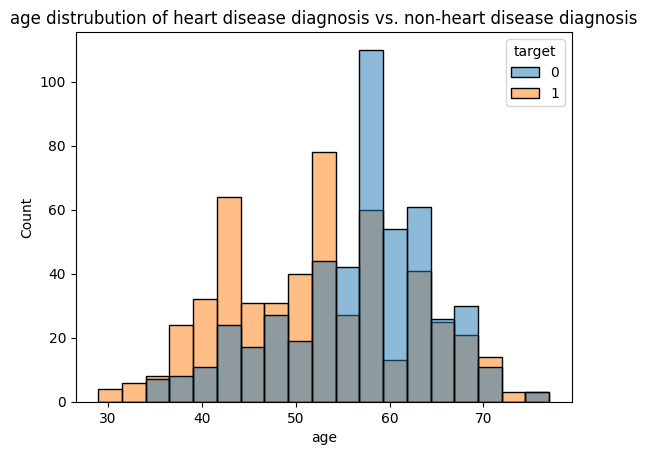

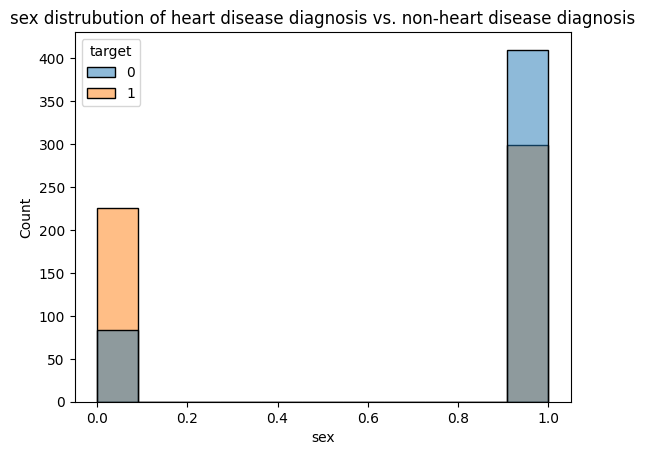

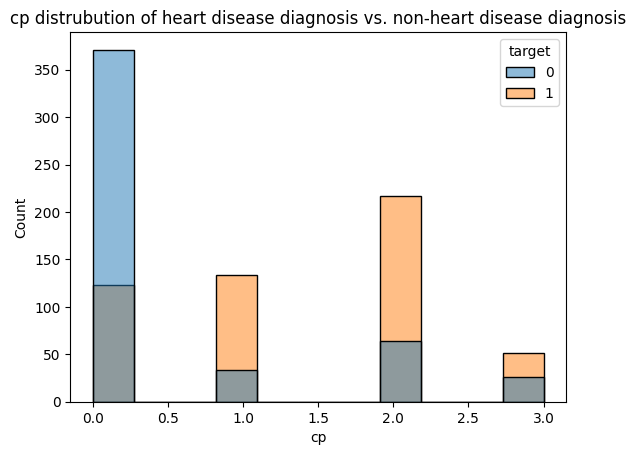

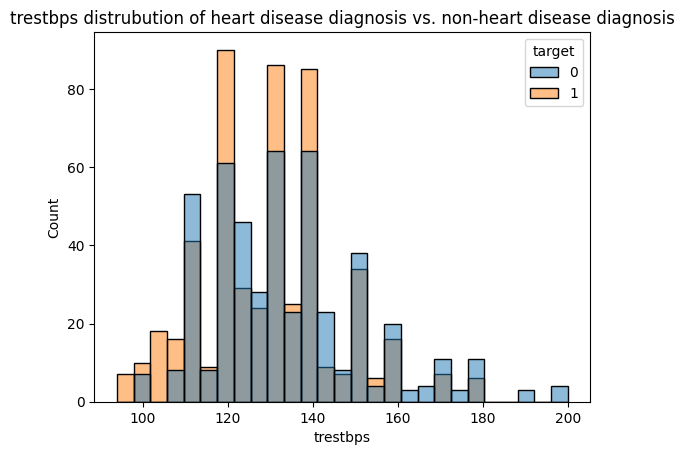

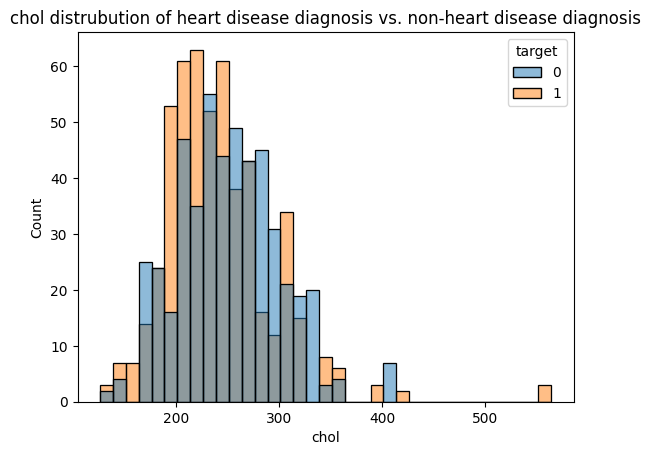

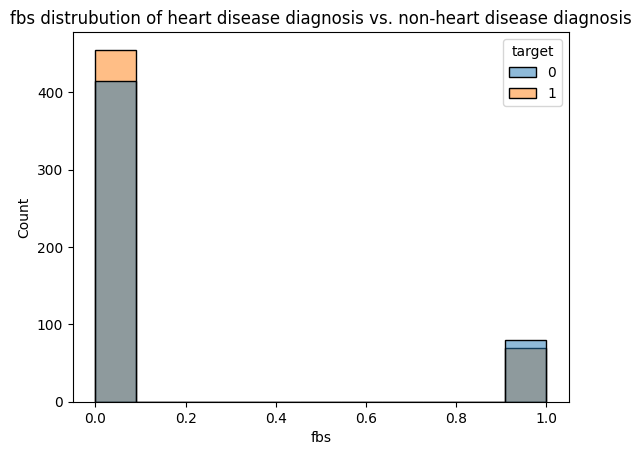

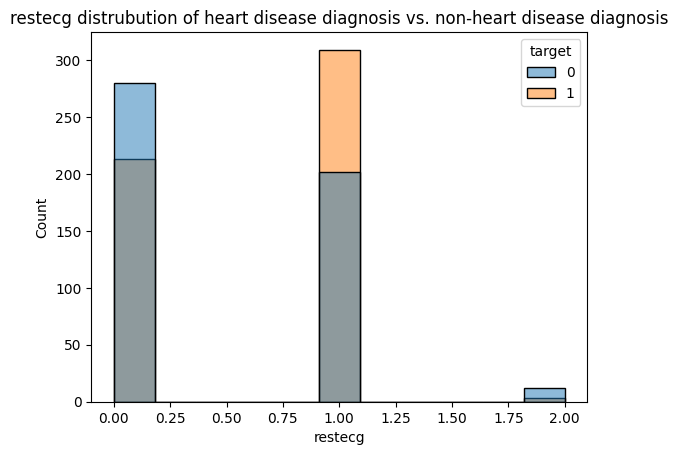

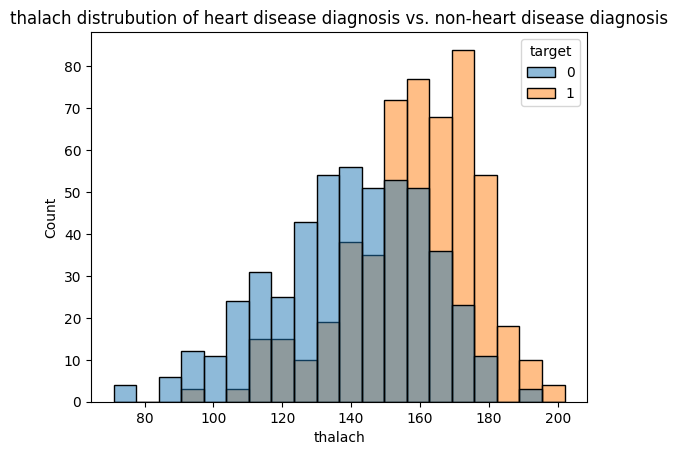

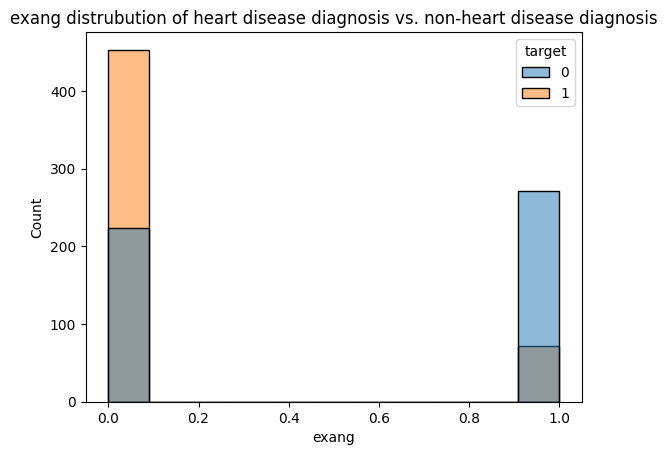

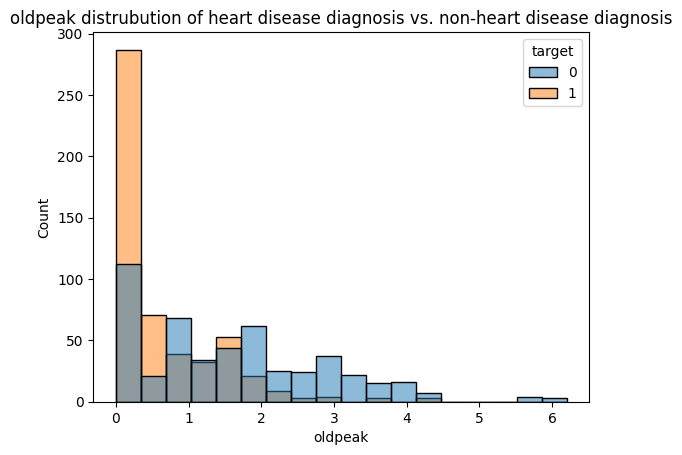

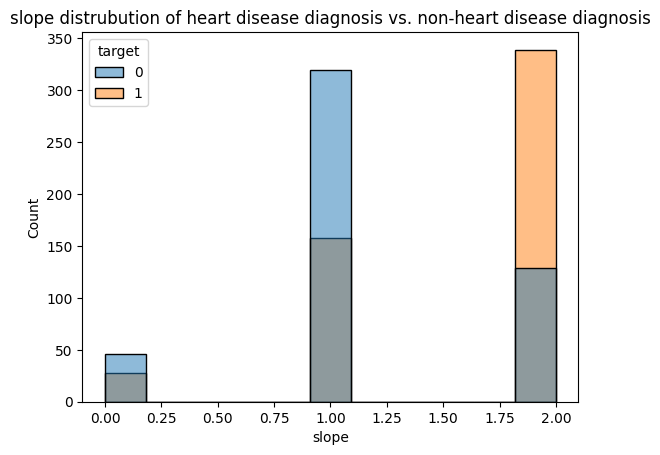

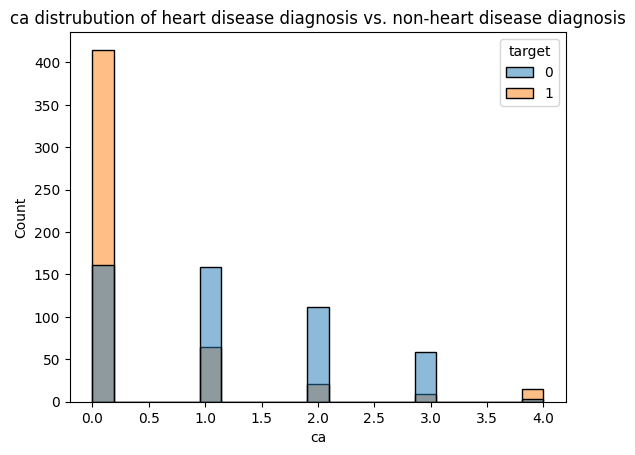

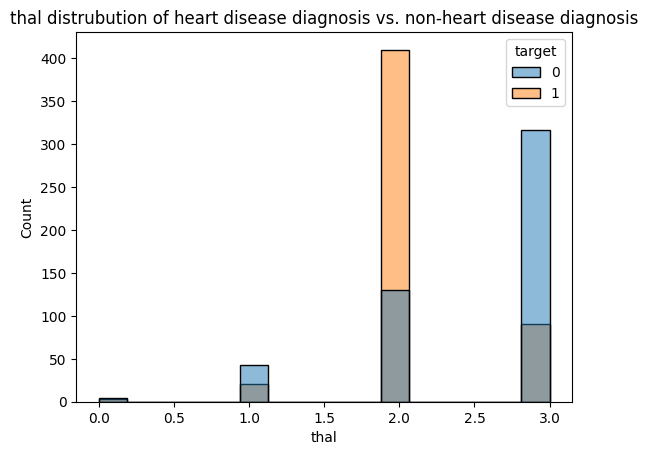

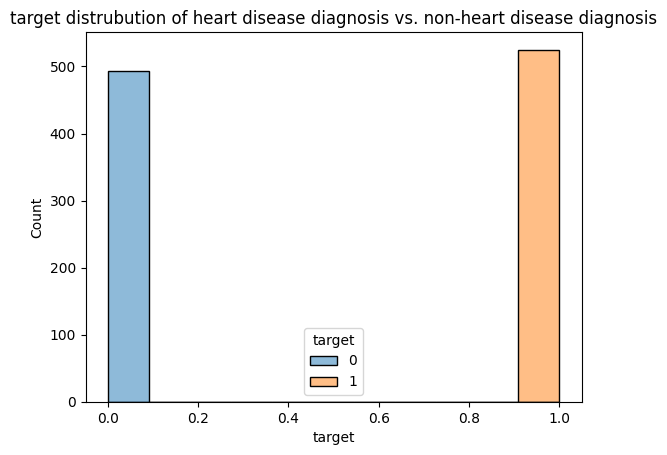

In [9]:
#performing data visualization to get a better understanding of data spread.

#will start with a histogram
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    sns.histplot(x = col, data = df, hue = 'target')
    plt.title (f"{col} distrubution of heart disease diagnosis vs. non-heart disease diagnosis")
    plt.show()

Based on the analysis here, it seems that age, sex, chol, thalach, and trestbps are quite complex in how they are related to the target outcome. For other variables, the values that lead to heart disease/non-heart disease classification, are far more clear. Let's investigate these particular variables in greater detail.

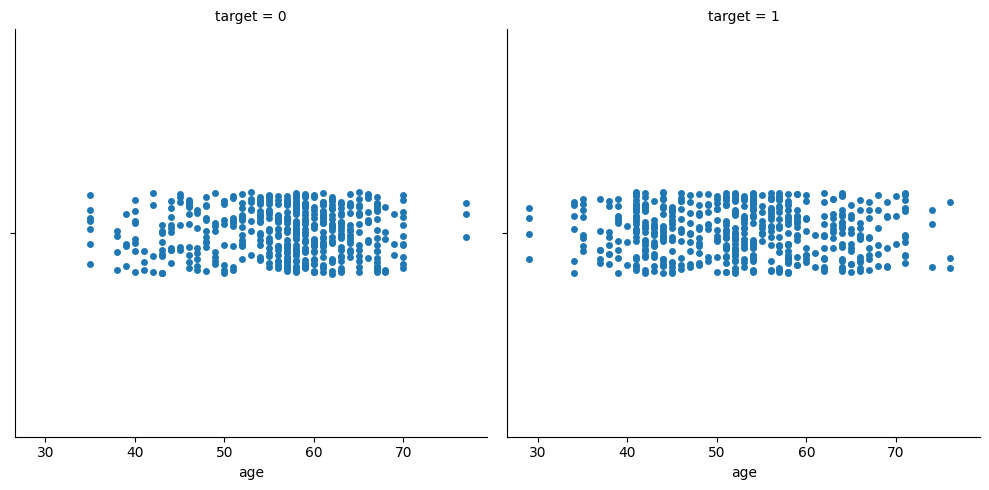

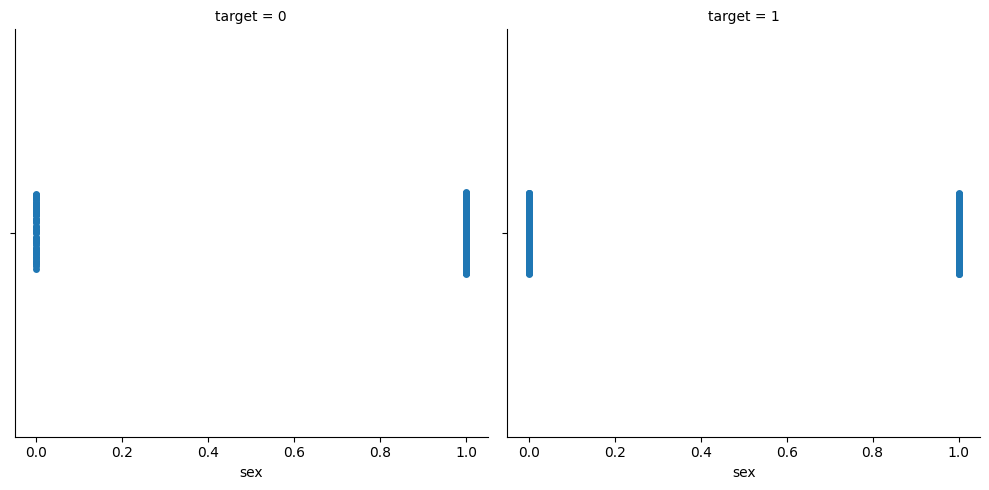

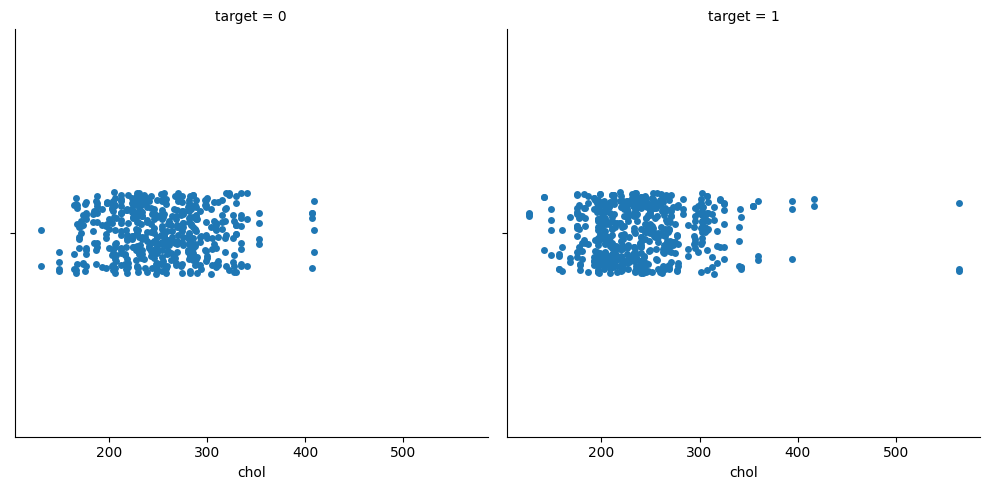

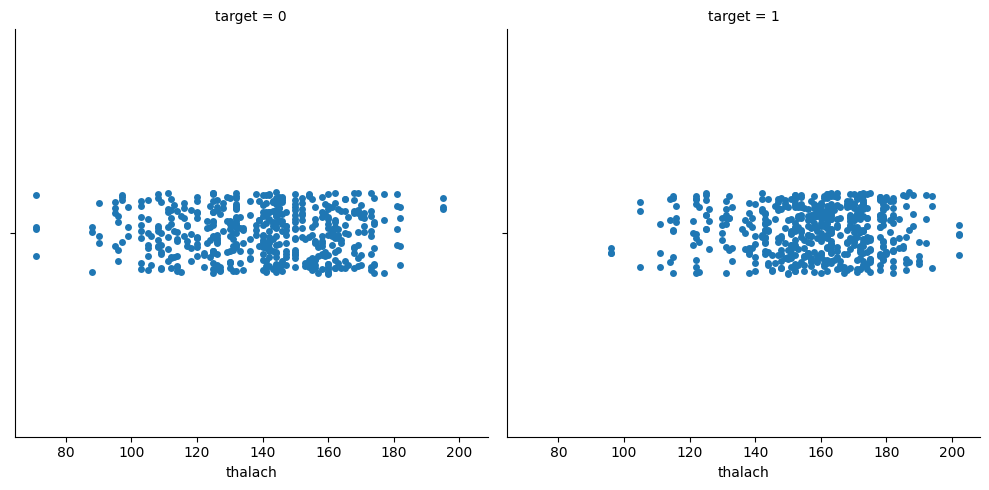

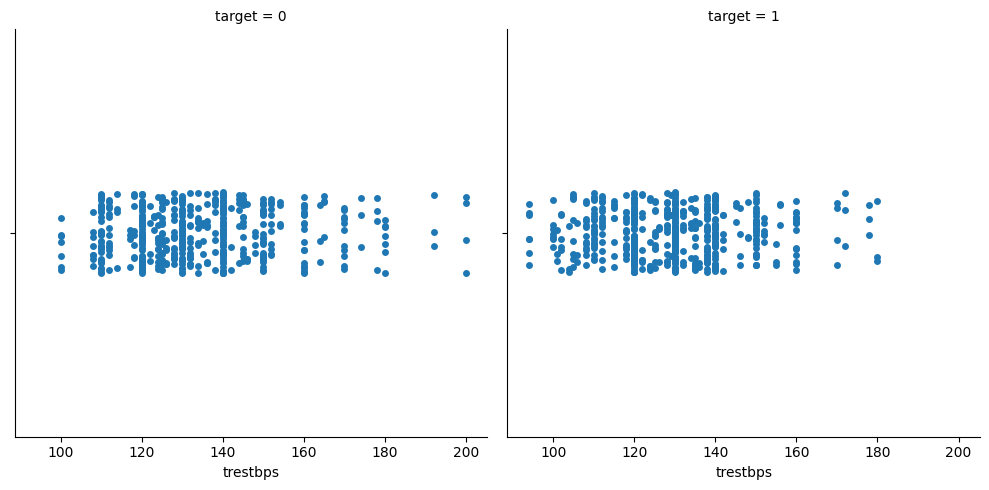

In [13]:
for i in df[['age', 'sex', 'chol', 'thalach', 'trestbps']]:
    plot_var = sns.catplot(x = i , col = "target", data = df, kind = "strip")
    plt.show()

While these variables appear to be quite indistinguishable in terms of their ability to visually highlight the diagnosis of heart disease, further analysis will need to be done. A correlation matrix can be incredibly helpful here.

<Axes: >

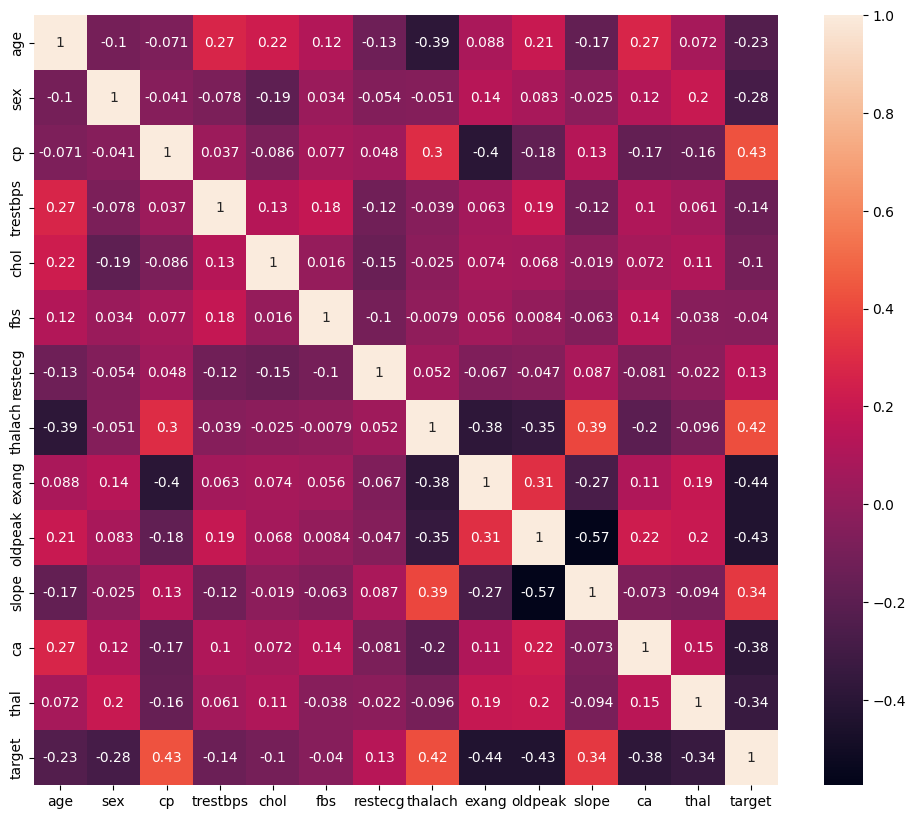

In [17]:
plt.figure(figsize= (12,10))
sns.heatmap(df.corr(), annot = True)

# Statistics & Feature Selection

As per the correlation matrix, it appears there's a number of features that can be effective at predicting the target. Namely, cp, thalach, exang and oldpeak all have among the highest values in the corrleation matrix. In the built out models, it'll be interesting to see how they fit.

In [24]:
#processing the data to remove outliers (if any) that exist
#using 3 standard deviations away from the mean as the logic for classifying as an outlier

import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df)) < 3).all(axis = 1)]
df.shape

(957, 14)

In [53]:
#since the dataset is small, and a need is not nessecarily present to optimize computing ability, backwards selection will be used. In this case, the recursive feature elimination process avaliable on sklearn will be used. This process recursively removes features to determine the best fit.
#defining x and y
X, y = df.drop('target', axis = 1), df['target']

#to initiate, a logistic regression model will be used with the RFE library. it tends to have favourable results have studies have denoted that it's feature selection works at similar accuracy rates for other models as well
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#using liblinear solver as it supports both L1 and L2 regularization. This can help to adjust for co-linearity as well as any interaction terms that may be present. A penalty has also been imposed using L1 regularization to reduce the impact of variables that are not important. This can even make certain coefficients to be exactly zero.
model = LogisticRegression(solver = 'liblinear', penalty = 'l1')
#selecting the top 5 features
rfe = RFE(estimator = model, n_features_to_select = 5)
fit = rfe.fit(X, y)

print('Num Features:', fit.n_features_)
print("Features Ranking:", fit.ranking_)




Num Features: 5
Features Ranking: [8 1 2 7 9 5 4 6 1 3 1 1 1]


Based on the index, it appears that the features of thal, ca, slope, exang, and sex have been selected.

In [38]:
#dropping the columns that are not needed
X.drop(columns=['age', 'cp', 'trestbps','chol','fbs','restecg','thalach','oldpeak'], inplace = True)

In [39]:
#training and splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
print(X_train)

     sex  exang  slope   ca  thal
332    1      0      0  0.0     2
510    0      1      2  1.0     2
322    1      1      1  3.0     3
596    1      1      2  0.0     2
507    0      0      2  0.0     2
..   ...    ...    ...  ...   ...
116    1      0      1  1.0     3
297    1      1      2  0.0     3
923    1      0      2  0.0     2
476    1      0      1  3.0     3
112    1      1      2  2.0     3

[765 rows x 5 columns]


In [45]:
#standardizing the training dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test)

[[1.         0.         0.         0.         0.5       ]
 [0.         1.         1.         0.33333333 0.5       ]
 [1.         1.         0.5        1.         1.        ]
 ...
 [1.         0.         1.         0.         0.5       ]
 [1.         0.         0.5        1.         1.        ]
 [1.         1.         1.         0.66666667 1.        ]]
     sex  exang  slope   ca  thal
898    0      0      1  0.0     2
520    1      1      2  1.0     3
384    1      1      2  0.0     3
953    0      1      1  0.0     2
917    1      0      2  0.0     2
..   ...    ...    ...  ...   ...
504    1      0      2  0.0     2
729    0      0      1  0.0     2
38     1      1      1  1.0     3
36     1      1      2  1.0     2
773    0      0      1  3.0     3

[192 rows x 5 columns]


# Model Selection

Since the data is tabulated in numerical format, and is of a classification-related nature, the two models that will be explored here will be Logistic Regression and Decision Trees.

# Logistic Regression

In [52]:
#building the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
#making a prediction
y_pred = model.predict(X_test_scaled)
#evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
#classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        97
           1       0.77      0.88      0.82        95

    accuracy                           0.81       192
   macro avg       0.82      0.81      0.81       192
weighted avg       0.82      0.81      0.81       192



While the accuracy is not bad (at perhaps 0.8125), it may become imperative now to optimize the hyperparameters to maximize and ensure that the most optimized hyperparameters are being used for the model. GridSearchCV from SkLearn will be used for this.

In [55]:
from sklearn.model_selection import GridSearchCV
#defining parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_object = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid_search_object.fit(X_train_scaled, y_train)
best_params = grid_search_object.best_params_
print(best_params)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [56]:
#applying the tuned hyperparameters

model = LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear')
model.fit(X_train_scaled, y_train)
#making a prediction
y_pred = model.predict(X_test_scaled)
#evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
#classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8177083333333334
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        97
           1       0.78      0.88      0.83        95

    accuracy                           0.82       192
   macro avg       0.82      0.82      0.82       192
weighted avg       0.82      0.82      0.82       192



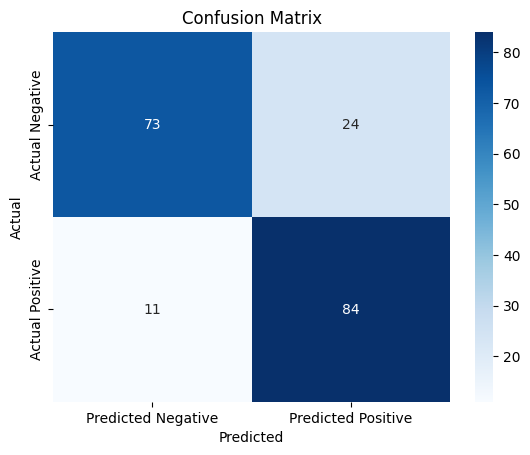

In [58]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8229166666666666
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        97
           1       0.80      0.85      0.83        95

    accuracy                           0.82       192
   macro avg       0.82      0.82      0.82       192
weighted avg       0.82      0.82      0.82       192



The accuracy of the decision tree model appears to be slightly better than the logistic model accuracy.

Let's optimize this.

In [61]:
#using grid search cv to determine to tune hyperparameters.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_object = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
grid_search_object.fit(X_train_scaled, y_train)
best_params = grid_search_object.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [62]:
#applying optimized hyperparameters into the model

model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf= 1, min_samples_split= 2)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8229166666666666
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        97
           1       0.80      0.85      0.83        95

    accuracy                           0.82       192
   macro avg       0.82      0.82      0.82       192
weighted avg       0.82      0.82      0.82       192



There appears to be a negligible improvement.

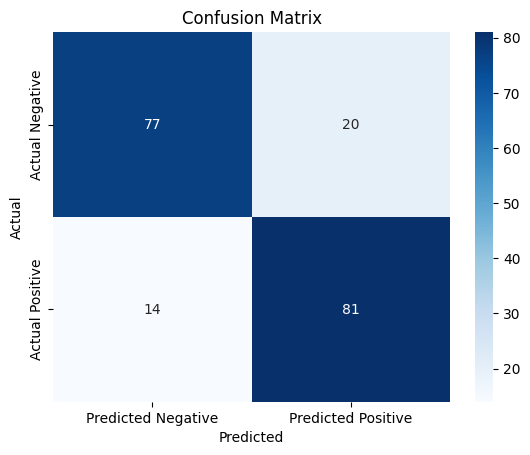

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()